In [1]:
%config IPCompleter.greedy=True
%config IPCompleter.debug=True
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from tqdm import tqdm,tqdm_notebook as tqdm


In [2]:
data5=pd.read_table(r'.\train.5.txt',sep=',',header=None)
data6=pd.read_table(r'.\train.6.txt',sep=',',header=None)
n5=data5.shape[0]
n6=data6.shape[0]
nwhole=n5+n6
_=np.array(["5","6"])
label=np.repeat(_,[n5,n6],axis=0)
data=pd.concat([data5,data6])
data_train,data_test,label_train,label_test=train_test_split(data,label,test_size=0.2,random_state=0)
#Load Data and divide into train set and test set.

# 1.

## (a)

The best ln(C) is around:-4.000000


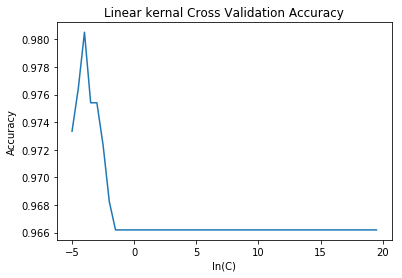

In [3]:
C=[math.exp(x / 2.0) for x in range(-10, 40)]
C_len=len(C)
linear_kernal_accuracy=[]
for i in range(C_len):
    linear=svm.SVC(kernel='linear',C=C[i])
    scores=cross_val_score(linear,data_train,label_train,cv=5)
    score=np.mean(scores)
    linear_kernal_accuracy.append(score)
#record different c in linear kernal model    
iter=np.arange(C_len)
plt.plot((iter-10)/2,linear_kernal_accuracy)
plt.xlabel("ln(C)")
plt.ylabel("Accuracy")
plt.title("Linear kernal Cross Validation Accuracy")
print("The best ln(C) is around:%f"%((np.argmax(linear_kernal_accuracy)-10)/2))

## (b)

In [4]:
C=[math.exp(x / 2.0) for x in range(-10,9)]
C_len=len(C)
gamma=[math.exp(x) for x in range(-15, 4)]
gamma_len=len(gamma)
rbf_kernal_accuracy=np.zeros((C_len,gamma_len))
pbar=tqdm(total=C_len*gamma_len)
for i in range(C_len):
    for j in range(gamma_len):
        pbar.update(1)
        rbf=svm.SVC(kernel='rbf',C=C[i],gamma=gamma[j])#use previous C
        scores=cross_val_score(rbf,data_train,label_train,cv=5)
        score=np.mean(scores)
        rbf_kernal_accuracy[i][j]=score
# the exception can be neglected


A Jupyter Widget

Best solution of ln(gamma) and ln(C) are:
(-4, 0.5)


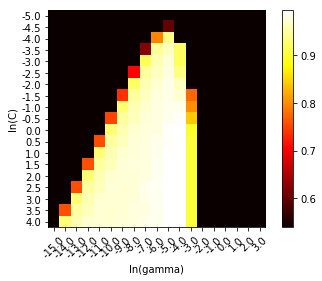

In [5]:
plt.imshow(rbf_kernal_accuracy,cmap="hot",interpolation='nearest')
plt.colorbar()
plt.xlabel("ln(gamma)")
plt.ylabel("ln(C)")
plt.xticks(np.arange(gamma_len),np.log(gamma), rotation=45)
_=plt.yticks(np.arange(C_len), np.log(C))
inx=np.unravel_index(rbf_kernal_accuracy.argmax(),rbf_kernal_accuracy.shape)
solution_gamma,solution_C=inx
solution_C=(solution_C-10)/2
solution_gamma=solution_gamma-15
print("Best solution of ln(gamma) and ln(C) are:")
print((solution_gamma,solution_C))

# 2

In [6]:
linear_SVM=svm.SVC(kernel='linear',C=math.exp(-4))
linear_SVM.fit(data_train,label_train)
linear_predict=linear_SVM.predict(data_test)
print("Misclassification rate of linear kernel %f"%(1-np.mean(linear_predict==label_test)))

rbf_SVM=svm.SVC(kernel='rbf',C=math.exp(0.5),gamma=math.exp(-4))
rbf_SVM.fit(data_train,label_train)
rbf_predict=rbf_SVM.predict(data_test)
print("Misclassification rate of rbf kernel %f"%(1-np.mean(rbf_predict==label_test)))

Misclassification rate of linear kernel 0.012295
Misclassification rate of rbf kernel 0.004098


Aparently,the non-linear SVM performs better than linear SVM in this case.We should try non-linear kernel SVM.